# Лабораторная работа 3

На платформе kaggle был взят датасет Mall_Customers. Поля:

CustomerID - ID покупателя;

Genre - пол;

Age - возраст;

Annual Income - доход;

Spending Score - оценка расходов.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Получаем зависимость оценки расходов от возраста. Для этого удаляем лишние поля (ID, пол, годовой доход).

In [22]:
data = data.drop(columns=['CustomerID','Genre','Annual Income (k$)'])

In [23]:
sort_data = data.sort_values(by=["Age", "Spending Score (1-100)"])

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(sort_data['Age'], sort_data['Spending Score (1-100)'], test_size=0.2,
                                                    random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

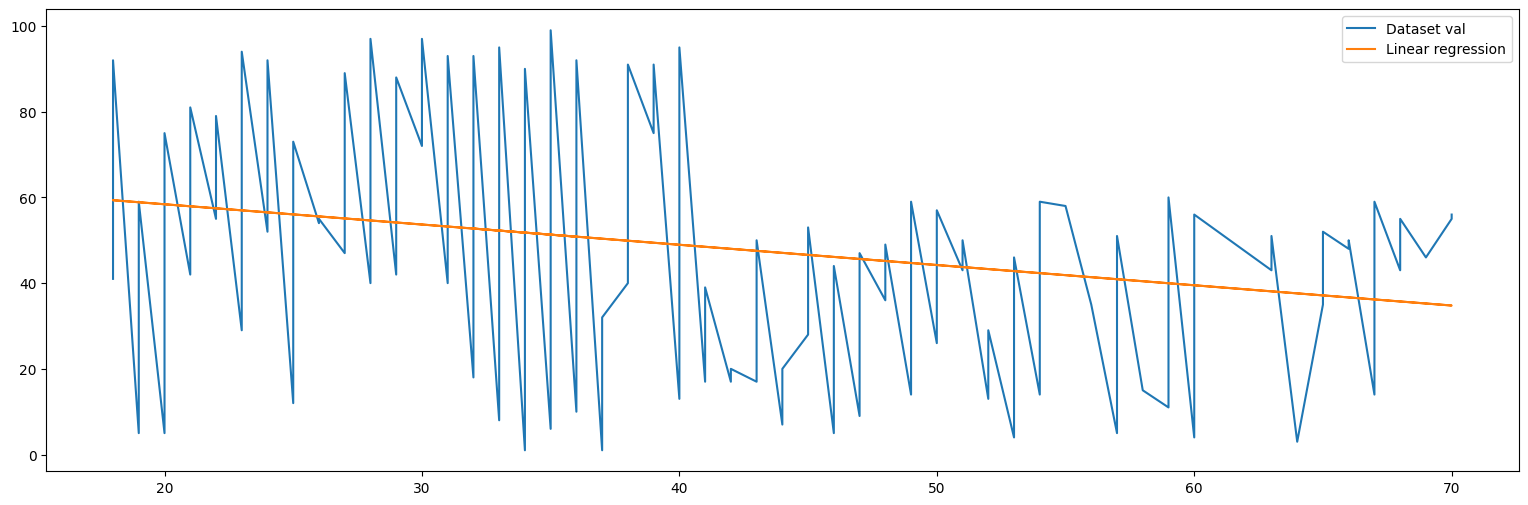

In [25]:
import matplotlib.pyplot as plt
figure, ax = plt.subplots(figsize = (19, 6))
ax.plot(sort_data['Age'], sort_data['Spending Score (1-100)'], label='Dataset val')
ax.plot(X_train, model.predict(X_train), label='Linear regression')
ax.legend()
plt.show()

Подсчет метрики

In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("MAE = %s" % mean_absolute_error(model.predict(X_test), y_test))
print('MSE = %s' % mean_squared_error(model.predict(X_test), y_test))

MAE = 22.174973019707004
MSE = 675.5039893154376


# Лабораторная работа 4

In [27]:
from catboost import CatBoostRegressor

In [28]:
catModel = CatBoostRegressor(iterations=2500,
                          learning_rate=0.1,
                          depth=6,
                          random_state=740)

catModel.fit(X_train, y_train, verbose=100)


y_pred = catModel.predict(X_test)

0:	learn: 24.6098228	total: 5.19ms	remaining: 13s
100:	learn: 19.8005573	total: 396ms	remaining: 9.41s
200:	learn: 19.1764711	total: 756ms	remaining: 8.65s
300:	learn: 19.0141696	total: 1.36s	remaining: 9.97s
400:	learn: 18.9539076	total: 1.85s	remaining: 9.71s
500:	learn: 18.9289805	total: 2.33s	remaining: 9.3s
600:	learn: 18.9192161	total: 2.82s	remaining: 8.91s
700:	learn: 18.9139224	total: 3.25s	remaining: 8.33s
800:	learn: 18.9113679	total: 3.65s	remaining: 7.74s
900:	learn: 18.9094333	total: 4.06s	remaining: 7.2s
1000:	learn: 18.9082548	total: 4.58s	remaining: 6.86s
1100:	learn: 18.9075577	total: 5.17s	remaining: 6.56s
1200:	learn: 18.9069866	total: 5.69s	remaining: 6.15s
1300:	learn: 18.9065752	total: 6.14s	remaining: 5.66s
1400:	learn: 18.9063733	total: 6.71s	remaining: 5.26s
1500:	learn: 18.9061556	total: 7.17s	remaining: 4.77s
1600:	learn: 18.9059193	total: 7.93s	remaining: 4.46s
1700:	learn: 18.9057520	total: 8.52s	remaining: 4s
1800:	learn: 18.9056129	total: 9.14s	remaining

Подсчет метрики

In [9]:
print('MSE = %s' % mean_squared_error(y_pred, y_test))


print("MAE = %s" % mean_absolute_error(y_pred, y_test))
     

MSE = 606.5131703330704
MAE = 20.77560650108307


In [10]:
import lightgbm as lgb

lightBmModel = lgb.LGBMRegressor(num_leaves=31,
                          learning_rate=0.1, 
                          n_estimators=100, 
                          random_state=42) 
lightBmModel.fit(X_train, y_train, verbose=10)

y_pred = lightBmModel.predict(X_test)

C:\Users\kosty\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Подсчет метрики

In [11]:
print('MSE = %s' % mean_squared_error(y_pred, y_test))

print("MAE = %s" % mean_absolute_error(y_pred, y_test))

MSE = 508.63664272278436
MAE = 18.415101242522827


In [12]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'alpha': 0.1,
    'lambda': 0.1,
    'min_child_weight': 1,
    'seed': 42
}

num_rounds = 100
xgbModel = xgb.train(params, dtrain, num_rounds)

y_pred = xgbModel.predict(dtest)

Подсчет метрики

In [13]:
print('MSE = %s' % mean_squared_error(y_pred, y_test))

print("MAE = %s" % mean_absolute_error(y_pred, y_test))

MSE = 577.8996299346784
MAE = 20.413149738311766


Лучший результат показал lightgbm. Далее идет xgboost и CatBoost.